# CO2 to Ethanol (fuel)
Ethanol (or the drinkable alcohol) is a part of [ethanol fuel](https://en.wikipedia.org/wiki/Ethanol_fuel) a form of fuel that can be used by a lot of the current cars.
You can use natural sources like different kids of crops but the best part is if we can get this from CO2 to create cycle.
For this will we use the reaction database we loaded into Neo4j

In [1]:
import json
import os
from pathlib import Path
from py2neo import Graph

with open("config.json") as f:
    config = json.load(f)

temp_dir = "temp"
os.makedirs(temp_dir, exist_ok=True)

port = config["port"]
user = config["user"]
pswd = config["pswd"]
neo4j_import_loc = Path(config["neo4j_import_loc"])

graph = Graph("bolt://localhost:" + port, auth=(user, pswd))

In [2]:
count = graph.run(
    """
        MATCH (co2:Compound {inChI: "InChI=1S/CO2/c2-1-3"})
        MATCH (ethanol:Compound {inChI: "InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3"})
        MATCH (co2)-[:INPUT {role: "REACTANT"}]->(r1)-[:OUTPUT]->(n:Compound)-[:INPUT {role: "REACTANT"}]->(r2)-[:OUTPUT]->(ethanol)
        RETURN count(*) as count
    """
).data()[0]["count"]
print(f"Number of paths between CO2 and ethanol: {count}")

Number of paths between CO2 and ethanol: 0


In [6]:
response = graph.run(
    """
        MATCH (co2:Compound {inChI: "InChI=1S/CO2/c2-1-3"})
        MATCH (ethanol:Compound {inChI: "InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3"})
        MATCH p=shortestPath((co2)-[:INPUT|OUTCOME*]->(ethanol))
        RETURN *
    """
).data()
print(response)

[{'co2': Node('Compound', inChI='InChI=1S/CO2/c2-1-3'), 'ethanol': Node('Compound', inChI='InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3'), 'p': Path(Node('Compound', inChI='InChI=1S/CO2/c2-1-3'), INPUT(Node('Compound', inChI='InChI=1S/CO2/c2-1-3'), Node('Reaction', reactionId='ord-fb9bfc7edc83470c9ac6f82e4994ac03'), role='REACTANT'), OUTCOME(Node('Reaction', reactionId='ord-fb9bfc7edc83470c9ac6f82e4994ac03'), Node('Compound', inChI='InChI=1S/ClH/h1H')), INPUT(Node('Compound', inChI='InChI=1S/ClH/h1H'), Node('Reaction', reactionId='ord-36ea6316e4de4e3f89c4bbd650c835dd'), role='REACTANT'), OUTCOME(Node('Reaction', reactionId='ord-36ea6316e4de4e3f89c4bbd650c835dd'), Node('Compound', inChI='InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3')))}]


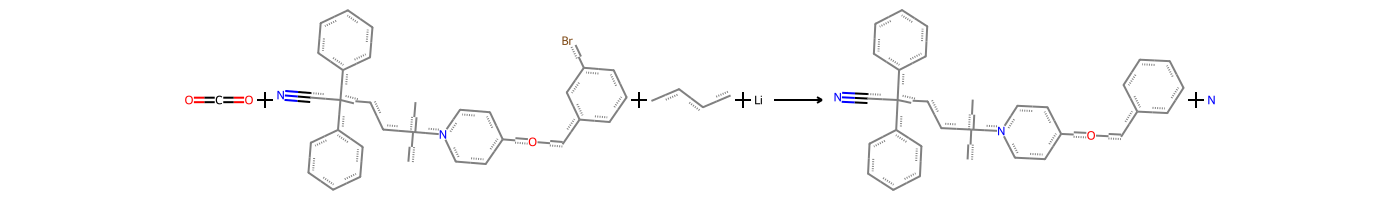

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

inputs1_raw = response[0]["inputs1"]
outputs1_raw = response[0]["outputs1"]

inputs1 = [Chem.MolFromInchi(i) for i in inputs1_raw]
outputs1 = [Chem.MolFromInchi(i) for i in outputs1_raw]

input1_smiles = ".".join([Chem.MolToSmiles(i) for i in inputs1])
output1_smiles = ".".join([Chem.MolToSmiles(i) for i in outputs1])
reaction = Chem.rdChemReactions.ReactionFromSmarts(f"{input1_smiles}>>{output1_smiles}")
Draw.ReactionToImage(reaction)

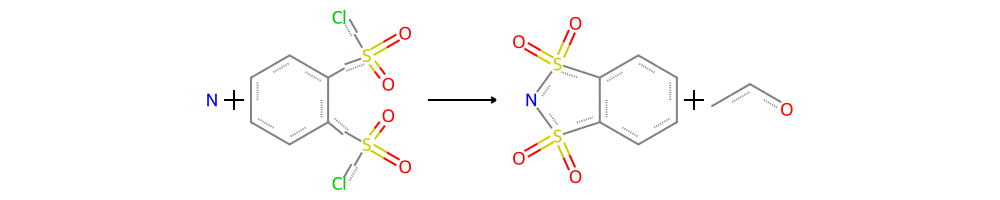

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

inputs2_raw = response[0]["inputs2"]
outputs2_raw = response[0]["outputs2"]

inputs2 = [Chem.MolFromInchi(i) for i in inputs2_raw]
outputs2 = [Chem.MolFromInchi(i) for i in outputs2_raw]

input2_smiles = ".".join([Chem.MolToSmiles(i) for i in inputs2])
output2_smiles = ".".join([Chem.MolToSmiles(i) for i in outputs2])
reaction = Chem.rdChemReactions.ReactionFromSmarts(f"{input2_smiles}>>{output2_smiles}")
Draw.ReactionToImage(reaction)

In [ ]:
inputs2

In [ ]:
outputs2